In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils import *

import copy
import math

In [28]:
# load the dataset
file = "data/data_classfied.txt"
x_train, y_train = load_data_multi(file)
devide = 1059
x_tumor = x_train[0:devide, :]
x_normal = x_train[devide:, :]
y_tumor = y_train[0:devide]
y_normal = y_train[devide:]

x_header = load_data_header(file)

#print(x_train)

In [27]:
# print x_tumor
print("Type of x_tumor:", type(x_tumor))
print("Last five elements of x_tumor are:\n", x_tumor[-5:])

# print x_normal
print("Type of x_normal:", type(x_normal))
print("First five elements of x_normal are:\n", x_normal[:5])

# print y_tumor
print("Type of y_tumor:", type(y_tumor))
print("Last five elements of y_tumor are:\n", y_tumor[-5:])

# print x_normal
print("Type of y_normal:", type(y_normal))
print("First five elements of y_normal are:\n", y_normal[:5])


print('The shape of x_tumor is:', x_tumor.shape)
print('The shape of x_normal is:', x_normal.shape)
print('The shape of y_tumor is: ', y_tumor.shape)
print('The shape of y_normal is: ', y_normal.shape)

print('Number of training examples (m):', len(x_train))
print()

Type of x_tumor: <class 'numpy.ndarray'>
Last five elements of x_tumor are:
 [[0.         0.         0.         0.         0.76431182 0.79185459]
 [0.52351059 0.27395787 1.29680904 1.06347316 1.26539844 1.18462833]
 [0.57607212 0.31565596 0.22797305 0.81675979 0.52477803 0.33538446]
 [0.         0.67430729 0.33283116 0.60514757 0.2982513  0.1988342 ]
 [0.14769608 0.35077819 0.21415931 0.36185539 0.45785784 0.73848039]]
Type of x_normal: <class 'numpy.ndarray'>
First five elements of x_normal are:
 [[0.37755531 0.11474729 0.29894653 0.3557166  0.41595893 0.24957536]
 [0.13187297 0.         0.         0.         0.13187297 0.42858714]
 [0.17040193 0.         0.33631889 0.         0.39618449 0.63900724]
 [0.18330582 0.18330582 0.         0.         0.18330582 0.        ]
 [0.34291393 0.         0.53886523 0.17145696 0.32148181 0.17145696]]
Type of y_tumor: <class 'numpy.ndarray'>
Last five elements of y_tumor are:
 [4.33760316 5.14919625 4.93235497 3.39661485 5.22651289]
Type of y_normal:

In [38]:
if 0:
    x_train = x_tumor
    y_train = y_tumor
else:
    x_train = x_normal
    y_train = y_normal

In [ ]:
# Create a scatter plot of the data. To change the markers to red "x",
# we used the 'marker' and 'c' parameters
plt.scatter(x_train, y_train, marker='x', c='r')
# Set the title
# plt.title("Profits vs. Population per city")
# Set the y-axis label
#plt.ylabel('Profit in $10,000')
# Set the x-axis label
#plt.xlabel('Population of City in 10,000s')

plt.show()


In [39]:
# z-score feature scaling
scaled_x_train = zscore_normalize_features(x_train)
#scaled_x_train = x_train

#y_train = zscore_normalize_features(y_train)

# print scaled_x_train
print("Type of scaled_x_train:", type(scaled_x_train))
print("First five elements of x_train are:\n", scaled_x_train[:5])


Type of scaled_x_train: <class 'numpy.ndarray'>
First five elements of x_train are:
 [[ 0.64647829 -0.59717539  0.24216914  0.19392107  0.33799406 -0.29643442]
 [-0.50200522 -1.04964457 -1.07560051 -1.10063953 -0.65622427  0.43656738]
 [-0.32189507 -1.04964457  0.40690816 -1.10063953  0.26878928  1.29817721]
 [-0.26157366 -0.32683679 -1.07560051 -1.10063953 -0.47622422 -1.31837376]
 [ 0.48454132 -1.04964457  1.2997415  -0.47665564  0.00735157 -0.61630679]]


In [ ]:
# Create a scatter plot of the data. To change the markers to red "x",
# we used the 'marker' and 'c' parameters
plt.scatter(scaled_x_train, y_train, marker='x', c='r')
# Set the title
#plt.title("Profits vs. Population per city")
# Set the y-axis label
#plt.ylabel('Profit in $10,000')
# Set the x-axis label
#plt.xlabel('Population of City in 10,000s')

plt.show()


In [40]:
# feature engineering
x = scaled_x_train
X = np.c_[x]    #, x**2, x**3]

print(X.shape)

(110, 6)


In [41]:
m, n = x_train.shape
test_w = np.random.rand(1,n)
print(test_w)
test_b = 0.2

tmp_dj_dw, tmp_dj_db = compute_gradient_matrix(X, y_train, test_w, test_b)

print('Gradient at test w, b:', tmp_dj_dw, tmp_dj_db)


[[0.98611883 0.03502643 0.99845028 0.27672777 0.37724657 0.61999428]]
Gradient at test w, b: [[1.24180155]
 [0.94786685]
 [1.53102608]
 [1.45081074]
 [1.27889916]
 [1.07487224]] -3.5469734762363636


In [42]:
m, n = x_train.shape
# initialize fitting parameters. Recall that the shape of w is (n,)
initial_w = np.zeros(n)
initial_b = 0.

# some gradient descent settings
iterations = 1500
alpha = 0.01

w, b, _= gradient_descent(X, y_train, initial_w, initial_b, alpha, iterations)
print("w,b found by gradient descent:", w, b)


Iteration    0: Cost 7.0504444116290514   
Iteration  150: Cost 0.48899704366303337   
Iteration  300: Cost 0.16630010441938706   
Iteration  450: Cost 0.15008730888824964   
Iteration  600: Cost 0.1491791220473181   
Iteration  750: Cost 0.149100739107533   
Iteration  900: Cost 0.14908648107934902   
Iteration 1050: Cost 0.1490824599434169   
Iteration 1200: Cost 0.14908115100763095   
Iteration 1350: Cost 0.14908069126954035   
w,b found by gradient descent: [ 0.12405829  0.09569233  0.03457661  0.01177097 -0.1112786   0.12564871] 3.7469724133850466


In [17]:
print(m)
print(n)

# print x_train
print("Type of scaled_x_train:", type(scaled_x_train))
print("First five elements of scaled_x_train are:\n", scaled_x_train[:5])

# print X
print("Type of X:", type(X))
print("First five elements of X are:\n", X[:5])

# print w
print("Type of w:", type(w))
print("First five elements of w are:\n", w[:5])


print('The shape of X is:', X.shape)
print('The shape of w is: ', w.shape)


1059
6
Type of scaled_x_train: <class 'numpy.ndarray'>
First five elements of scaled_x_train are:
 [[0.17088312 0.36787291 0.77609418 0.72625327 0.69065262 0.38448702]
 [0.45748046 0.         0.20234709 0.29340328 0.30857931 0.23775783]
 [0.99336503 0.50963945 0.34551827 0.65264601 0.83500364 1.15748621]
 [0.15393934 0.         0.         0.15393934 0.36560594 0.52724225]
 [0.17199091 0.25798636 0.17199091 0.79115817 0.61630017 0.17199091]]
Type of X: <class 'numpy.ndarray'>
First five elements of X are:
 [[0.17088312 0.36787291 0.77609418 0.72625327 0.69065262 0.38448702]
 [0.45748046 0.         0.20234709 0.29340328 0.30857931 0.23775783]
 [0.99336503 0.50963945 0.34551827 0.65264601 0.83500364 1.15748621]
 [0.15393934 0.         0.         0.15393934 0.36560594 0.52724225]
 [0.17199091 0.25798636 0.17199091 0.79115817 0.61630017 0.17199091]]
Type of w: <class 'numpy.ndarray'>
First five elements of w are:
 [ 0.17029532 -0.08029708  0.11572202  0.02402818  0.10195219]
The shape of X 

[4.53395521 4.4770164  4.7286728  ... 4.52244623 4.36132009 4.48099097]


{'whiskers': [<matplotlib.lines.Line2D at 0x260ad3086a0>,
 'caps': [<matplotlib.lines.Line2D at 0x260ad308be0>,
 'boxes': [<matplotlib.lines.Line2D at 0x260ad308400>],
 'medians': [<matplotlib.lines.Line2D at 0x260ad316190>],
 'fliers': [<matplotlib.lines.Line2D at 0x260ad316430>],
 'means': []}

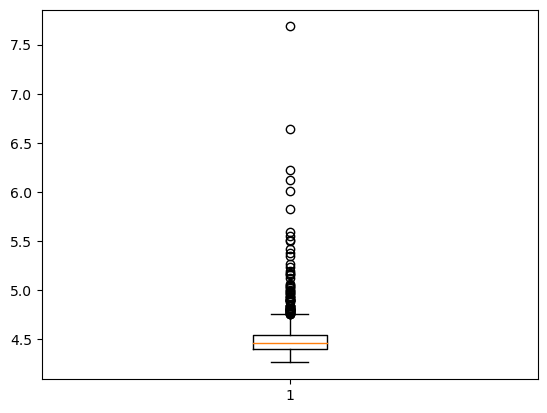

In [18]:
predicted = X @ w + b
print(predicted)
plt.boxplot(predicted)

In [ ]:
# Plot the linear fit
plt.plot(x_train, predicted, c="b")

# Create a scatter plot of the data.
plt.scatter(x_train, y_train, marker='x', c='r')

# Set the title
#plt.title("Profits vs. Population per city")
# Set the y-axis label
#plt.ylabel('Profit in $10,000')
# Set the x-axis label
#plt.xlabel('Population of City in 10,000s')



In [ ]:
predict1 = 3.5 * w + b
print('For population = 35,000, we predict a profit of $%.2f' % (predict1*10000))

predict2 = 7.0 * w + b
print('For population = 70,000, we predict a profit of $%.2f' % (predict2*10000))
